# Welcome to the tutorial on 2D-Transformations

---

### In this document, we'll talk about the following:
- Scaling (Resizing)
- Rotating
- Fliping
- Affine transformation
- Perspective Transformation

We can perform various transformations on a 2D image. OpenCV has plenty of functions to help us realize the transformations. Let's go through them, but first we have to import our beloved packages. We will also include the math package to perform some mathematical operations.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import math

For this excercise, we'll be using a **Sudoku** but you are free to use any image you wish.  
Let's import the image and view it using Matplotlib's plt module.

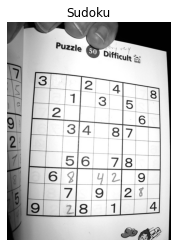

In [2]:
img = cv2.imread('./Assets/sudoku.jpg')

plt.imshow(img)
plt.axis("off")
plt.title("Sudoku")
plt.show()

Let's view the shape of the original image.

In [3]:
img.shape

(800, 600, 3)

Let's create a function which will help us easily display the images.

In [4]:
def plotter(org_img, new_img, axis='off'):
    
    fig=plt.figure(figsize=(7,4))
    rows = 1
    columns = 2

    fig.add_subplot(rows, columns, 1)
    plt.imshow(org_img); plt.axis(axis); plt.title("Original")

    fig.add_subplot(rows, columns, 2)
    plt.imshow(new_img); plt.axis(axis); plt.title("After Operation")

---
## Scaling (Resizing)
Let's try resizing this image to a rectangle of **Height 150 and Width 100**.

#### Using OpenCV
We'll be using the following function:

#### `cv2.resize(src, dsize [,  fx, fy, interpolation = INTER_LINEAR ])`
##### Parameters
**src**: Source image, a numpy array  
**dsize**: 	Output image size  
**fx(optional)**: scale factor along the horizontal axis  
**fy(optional)**: scale factor along the vertical axis  
**interpolation(optional)**: interpolation method. There are various Interpolation method available in OpenCV

|        Flag        | Description                           |
| :----------------: | :------------------------------------ |
|   INTER_NEAREST    | nearest neighbor interpolation        |
|    INTER_LINEAR    | bilinear interpolation                |
|    INTER_CUBIC     | bicubic interpolation                 |
|     INTER_AREA     | resampling using pixel area relation. |
| INTER_LINEAR_EXACT | bit exact bilinear interpolation      |
|  WARP_INVERSE_MAP  | inverse transformation                |

All possible Interpolation methods can be found [here](https://docs.opencv.org/trunk/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121).
##### Returns
This method returns the resized image.

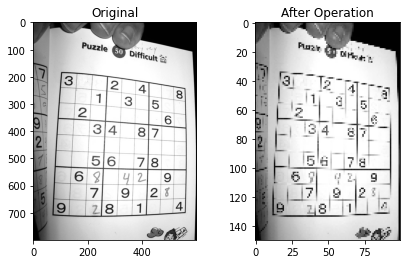

In [5]:
rect_img = cv2.resize(img, (100, 150))

plotter(img, rect_img, axis='on')

Let's see the new shape of the resized image.

In [6]:
rect_img.shape

(150, 100, 3)

#### Using NumPy
We'll be making a function which takes an image and a transformation matrix T that performs operations on it.

In [7]:
def transformer(img, T, transformed_img):
    row, col, channels = img.shape
    
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            pixel_data = img[i, j, :]
            input_coords = np.array([i, j, 1])
            
            i_out, j_out, _ = T @ input_coords            
            i_out = int(i_out)
            j_out = int(j_out)
            
            transformed_img[i_out, j_out, :] = pixel_data
    
    return transformed_img

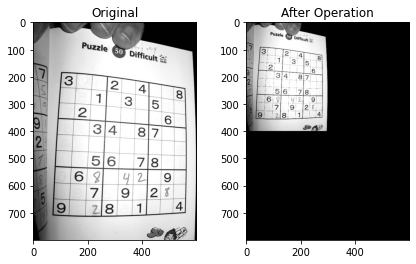

In [8]:
cx = 0.5
cy = 0.5
scaling_mat = np.array([ [cx ,0, 0] ,[0 ,cy, 0] ,[0 ,0, 1] ])

row, col, channels = img.shape
img_scaled = np.zeros((row, col, channels), dtype=np.uint8)

transformer(img, scaling_mat, img_scaled)
plotter(img, img_scaled, axis='on')

The `@` symbol here is used to perform Matrix multiplication in Python.

**NOTE**: You can refer this [link](https://stackabuse.com/affine-image-transformations-in-python-with-numpy-pillow-and-opencv/) for more explanation on the values and formation of Transformation matrix.

---
## Translation
Now let's translate an image. For this we create a translation matrix `M` first and then apply it on the image.

In [9]:
tx = 100
ty = 50
rows, cols, channels = img.shape
M = np.float32([[1,0,100],[0,1,50]])

#### Using OpenCV
We'll be using the following function to apply the Translation matrix on the image.

#### `cv2.warpAffine(src, M, dsize)`
##### Parameters
**src**: Source image, a numpy array   
**M**: 2X3 transformation matrix  
**dsize**: size of the output image  

##### Returns
This method returns the transformed source image using the specified matrix M.   
The transformation is done using the following formula:  
<center>
( M<sub>11</sub>X +  M<sub>12</sub>Y +  M<sub>13</sub>, M<sub>21</sub>Y +  M<sub>22</sub>Y +  M<sub>23</sub> )</center>

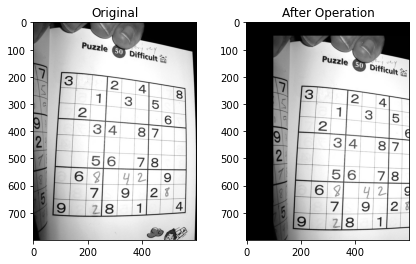

In [10]:
translated = cv2.warpAffine(img,M,(cols,rows))

plotter(img, translated, axis='on')

#### Using NumPy

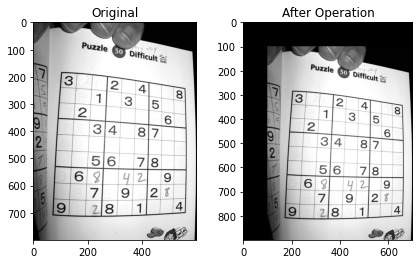

In [11]:
tx = 100
ty = 100
translation_mat = np.array([ [1 ,0, tx] ,[0 ,1, ty] ,[0 ,0, 1] ])

img_translated = np.zeros((row+tx, col+ty, channels), dtype=np.uint8)

transformer(img, translation_mat, img_translated)
plotter(img, img_translated, axis='on')

**Note the change betweeen OpenCV and NumPy output is axes range and the extra black border on the top and left**.

---
## Rotation
Now let's rotate the original image by 90 degrees.

#### Using OpenCV
We'll be using the following function:

#### `cv2.rotate(src, rotate_code)`
##### Parameters
**src**: Source image, a numpy array   
**rotate_code**: Code to specify how to rotate the array   

| Code                           | Description                     |
| :----------------------------: | :------------------------------ |
| cv2.ROTATE_90_CLOCKWISE        | Rotate 90&deg; Clockwise        |
| cv2.ROTATE_90_COUNTERCLOCKWISE | Rotate 90&deg; CounterClockwise |
| cv2.ROTATE_180                 | Rotate 180&deg;                 |

##### Returns
This method returns the rotated image

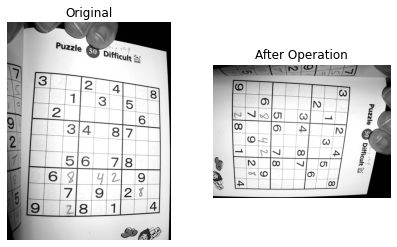

In [12]:
rot_90_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) 

plotter(img, rot_90_img)

#### Using NumPy
Since the loaded image is just a NumPy array the operation can be performed using NumPy functions too. We'll be using the following function:

#### `np.rot90( src [, k=1, axes=(0, 1)])`
This functions rotates a numpy array by 90&deg; counter-clockwise 
##### Parameters
**src**: Source image, a numpy array   
**k(optional)**: Number of times the array is rotated by 90&deg; counter-clockwise   
**axes(optional)**: The plane of axes in which the array is rotated
##### Returns
This method returns the rotated image in Anti-Clockwise fashion.

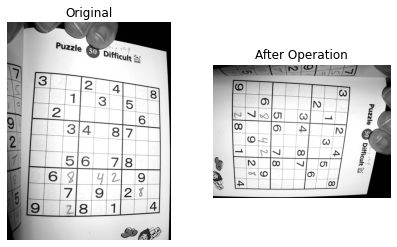

In [13]:
rot_90_img_np = np.rot90(img, 3)

plotter(img, rot_90_img_np)

We can also do the same operation using the transformation matrix computed manually like we did for Translation.

This will return rotated image just like `cv2.rotate` function in Clockwise fashion.

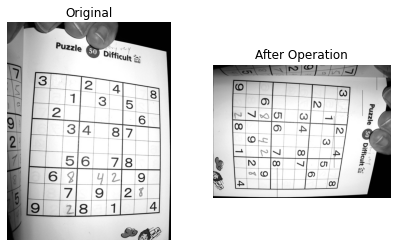

In [14]:
theta = math.radians(90)
sin_theta = math.sin(theta)
cos_theta = math.cos(theta)

rotation_mat = np.array([ [cos_theta ,sin_theta, 0] ,[-sin_theta ,cos_theta, 0] ,[0 ,0, 1] ])

img_translated = np.zeros((col, row, channels), dtype=np.uint8)

transformer(img, rotation_mat, img_translated)
plotter(img, img_translated)

There is one more way to compute this Transformation matrix, i.e. by using `cv2.getRotationMatrix2D` function.

You can read more about it from this [link](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html#rotation).

---
## Flip

#### Using OpenCV
We can flip the image horizontally or vertically using the following function:

#### `cv2.flip(src, flip_code)`
##### Parameters
**src**: Source image, a numpy array   
**flip_code**: Code to specify how to flip the array   

|        Code         | Description                            |
| :-----------------: | :------------------------------------- |
| Negative value (<0) | Flip around the both x-axis and y-axis |
|          0          | Flip around the x-axis                 |
| Positive value (>0) | Flip around the y-axis                 |

##### Returns
This method returns the rotated image

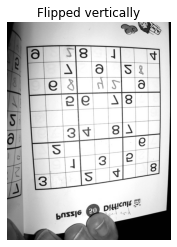

In [15]:
flip_img = cv2.flip(img, 0) 

plt.imshow(flip_img)
plt.axis("off")
plt.title("Flipped vertically")
plt.show()

#### Using NumPy
Since the loaded image is just a NumPy array the operation can be performed using NumPy functions too.

We'll be using the following functions:

#### `np.fliplr( src )`
This functions flips array around the y-axis  
**Note: lr means Left Right**
##### Parameters
**src**: Source image, a numpy array   
##### Returns
This method returns the flipped image

#### `np.flipud( src )`
This functions flips array around the x-axis  
**Note: ud means Up Down**
##### Parameters
**src**: Source image, a numpy array   
##### Returns
This method returns the flipped image

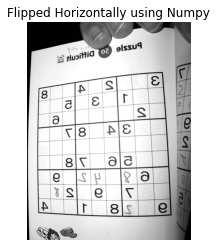

In [16]:
fliplr_np = np.fliplr(img)

plt.imshow(fliplr_np)
plt.axis("off")
plt.title("Flipped Horizontally using Numpy")
plt.show()

---
#### Note: To best understand the use of the following functions, we'll be trying to select only the sudoku box from the given image.

## Affine Transformation

Affine transformation is a linear mapping method that preserves points, straight lines, and planes. Sets of parallel lines remain parallel after an Affine transformation. It is generally used to correct for geometric distortions or deformations that occur with non-ideal camera angles.

###### We'll be using the following function to plot some points over our image which will help in visualizing them better.

#### `cv2.circle(img, center, radius, color[, thickness])`
##### Parameters
**img**: Image where the circle is drawn   
**center**: Center of the circle  
**radius**: Radius of the circle  
**color**: Circle color in **BGR** format   
**thickness(optional)**: Thickness of the circle outlineif positive. Negative thickness means that a filled circle is to be drawn.        
##### Returns
This method plots circles in our given image

Before we start applying the transformation, we'll define some helper functions which will help us visualize the process better.

In [17]:
def plotPoint(img, x, y, color = (0, 255, 255)):
    return cv2.circle(img, (x,y), radius=20, color=color, thickness=-1)

To perform Affine transformation, we first need to choose **three points** from input image and their corresponding locations in output image.

We use `np.float32()` to create a 2D Matrix where each row contains a X and Y cooridnate.<br/>
`pts1` holds the three points from the input image<br/>
`pts2` holds their corresponding locations in output image

In [18]:
pts1 = np.float32([[110,190], [210,190], [100,290]])
pts2 = np.float32([[15,15], [115,15], [15,115]])

Let's plot these points on a copy of our original image.

In [19]:
img_aff = np.copy(img)
for i in pts1:
    plotPoint(img_aff, int(i[0]), int(i[1]))
for i in pts2:
    plotPoint(img_aff, int(i[0]), int(i[1]), color = (255, 0, 0))

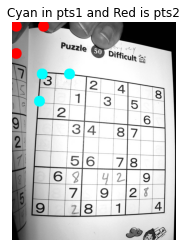

In [20]:
plt.imshow(img_aff)
plt.axis("off")
plt.title("Cyan in pts1 and Red is pts2")
plt.show()

Using these two sets of points we now create a **Transformation matrix** using the `cv2.getAffineTransform()`  
We also store the shape value of the original image in corresponding variables.

We'll be using the following functions:

#### `cv2.getAffineTransform(src, dst) `
Calculates an Affine transform from three pairs of the corresponding points.
##### Parameters
**src**: Coordinates of triangle vertices in the source image  
**dst**: Coordinates of the corresponding triangle vertices in the destination image   

##### Returns
This method returns an 2x3 matrix of an Affine transform.

#### `cv2.warpAffine(src, M, dsize)`
##### Parameters
**src**: Source image, a numpy array   
**M**: 2X3 transformation matrix  
**dsize**: size of the output image  

##### Returns
This method returns the transformed source image using the specified matrix M.   
The transformation is done using the following formula:  
<center>
( M<sub>11</sub>X +  M<sub>12</sub>Y +  M<sub>13</sub>, M<sub>21</sub>Y +  M<sub>22</sub>y +  M<sub>23</sub> )</center>

In [21]:
aff_M = cv2.getAffineTransform(pts1,pts2)
rows,cols,ch = img.shape

Let's use the Transformation matrix and the original image to perform the final step for Affine Transformation.

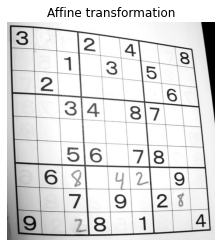

In [22]:
img = cv2.warpAffine(img,aff_M,(cols-75,rows-250))

plt.imshow(img)
plt.axis("off")
plt.title("Affine transformation")
plt.show()

---
## Perspective Transformation

In Perspective Transformation straight lines will remain straight even after the transformation. It is similar to changing the camera's position.   
We'll be using the following functions:

#### `cv2.getPerspectiveTransform(src, dst) `
Calculates an perspective transform from three pairs of the corresponding points.
##### Parameters
**src**: Coordinates of quadrangle vertices in the source image  
**dst**: Coordinates of the corresponding quadrangle vertices in the destination image   

##### Returns
This method returns an 3x3 matrix of an perspective transform.

#### `cv2.warpPerspective(src, M, dsize)`
##### Parameters
**src**: Source image, a numpy array   
**M**: 3X3 transformation matrix  
**dsize**: size of the output image  

##### Returns
This method returns the transformed source image using the specified matrix M

Similar to Affine transform, we find points and its corresponding locations in the output and find the transformation matrix. Then we apply the transformation

In [23]:
img.shape

(550, 525, 3)

In [24]:
pts1 = np.float32([[15,15], [465,65], [510,520], [25,530]])
pts2 = np.float32([[15,15], [510,15], [510,520], [15,520]])

In [25]:
img_persp = np.copy(img)
for i in pts1:
    plotPoint(img_persp, int(i[0]), int(i[1]))
for i in pts2:
    plotPoint(img_persp, int(i[0]), int(i[1]), color = (255, 0, 0))

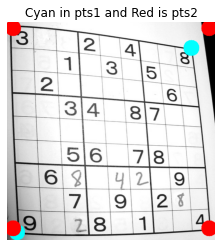

In [26]:
plt.imshow(img_persp)
plt.axis("off")
plt.title("Cyan in pts1 and Red is pts2")
plt.show()

Notice how all the final points (`pts2` i.e. red points) form a square. Ideally this is what we want, the final image needs to be a square.

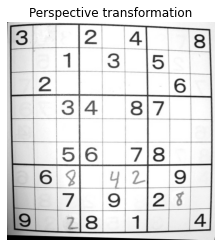

In [27]:
pers_M = cv2.getPerspectiveTransform(pts1,pts2)
rows,cols,ch = img.shape

img = cv2.warpPerspective(img,pers_M,(cols,rows))

plt.imshow(img)
plt.axis("off")
plt.title("Perspective transformation")
plt.show()

Now we have a clear top down view of the sudoku box. 

## References

| Figures      | Reference                                         |
| :----------- | :------------------------------------------------ |
| Sudoko Image | https://www.flickr.com/photos/johnjack/4264107415 |

| Links               | Reference                                                                                              |
| :------------------ | :----------------------------------------------------------------------------------------------------- |
| Interpolation Flags | https://docs.opencv.org/trunk/da/d54/group__imgproc__transform.html#ga5bb5a1fea74ea38e1a5445ca803ff121 |
